<a href="https://colab.research.google.com/github/Matheus-Ataide/Artificial_Intelligence_/blob/main/TEIN_Avaliacao5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Árvores de Decisão**

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
Cancer_Mama = pd.read_csv('/content/sample_data/Maternal Health Risk Data Set.csv') # acessando o arquivo .csv 
#cm = sns.load_dataset('titanic')


feature_names = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
Cancer_Mama['RiskLevel'] = Cancer_Mama['RiskLevel'].map({'high risk': 0, 'low risk': 1, 'mid risk': 2})
Cancer_Mama.dropna(subset=feature_names, inplace=True)  #891 para 714

X = Cancer_Mama[feature_names]
y = Cancer_Mama['RiskLevel']

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]
0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: RiskLevel, Length: 1014, dtype: int64


In [ ]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (760, 6)
Tamanho de X_test:  (254, 6)
Tamanho de y_train:  (760,)
Tamanho de y_test:  (254,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=123)

In [ ]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)
from collections import Counter
print(Counter(y_test_pred))
print(Counter(y_test_true))


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Counter({2: 115, 1: 71, 0: 68})
Counter({1: 104, 2: 81, 0: 69})
Acurácia de Treino: 0.7

 ---------------------------

Acurácia de Teste: 0.63


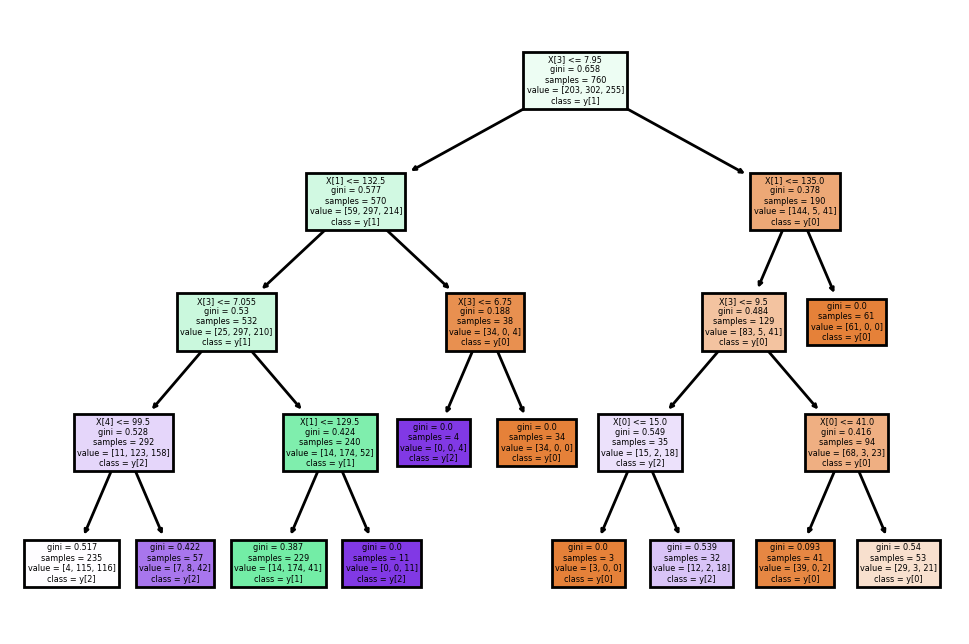

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

import matplotlib.pyplot as plt


from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf, class_names=True, filled=True)
plt.show()

**Algoritmo de Bayes**

In [12]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

CM = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n', CM)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[49  9 11]
 [ 1 95  8]
 [ 9 57 15]]
accuracy_Naive Bayes: 0.626
precision_Naive Bayes: 0.626
recall_Naive Bayes: 0.626
f1-score_Naive Bayes : 0.626


     SystolicBP  DiastolicBP  type
0           3.5          1.4     0
1           3.0          1.4     0
2           3.2          1.3     0
3           3.1          1.5     0
4           3.6          1.4     0
..          ...          ...   ...
145         3.0          5.2     2
146         2.5          5.0     2
147         3.0          5.2     2
148         3.4          5.4     2
149         3.0          5.1     2

[150 rows x 3 columns]


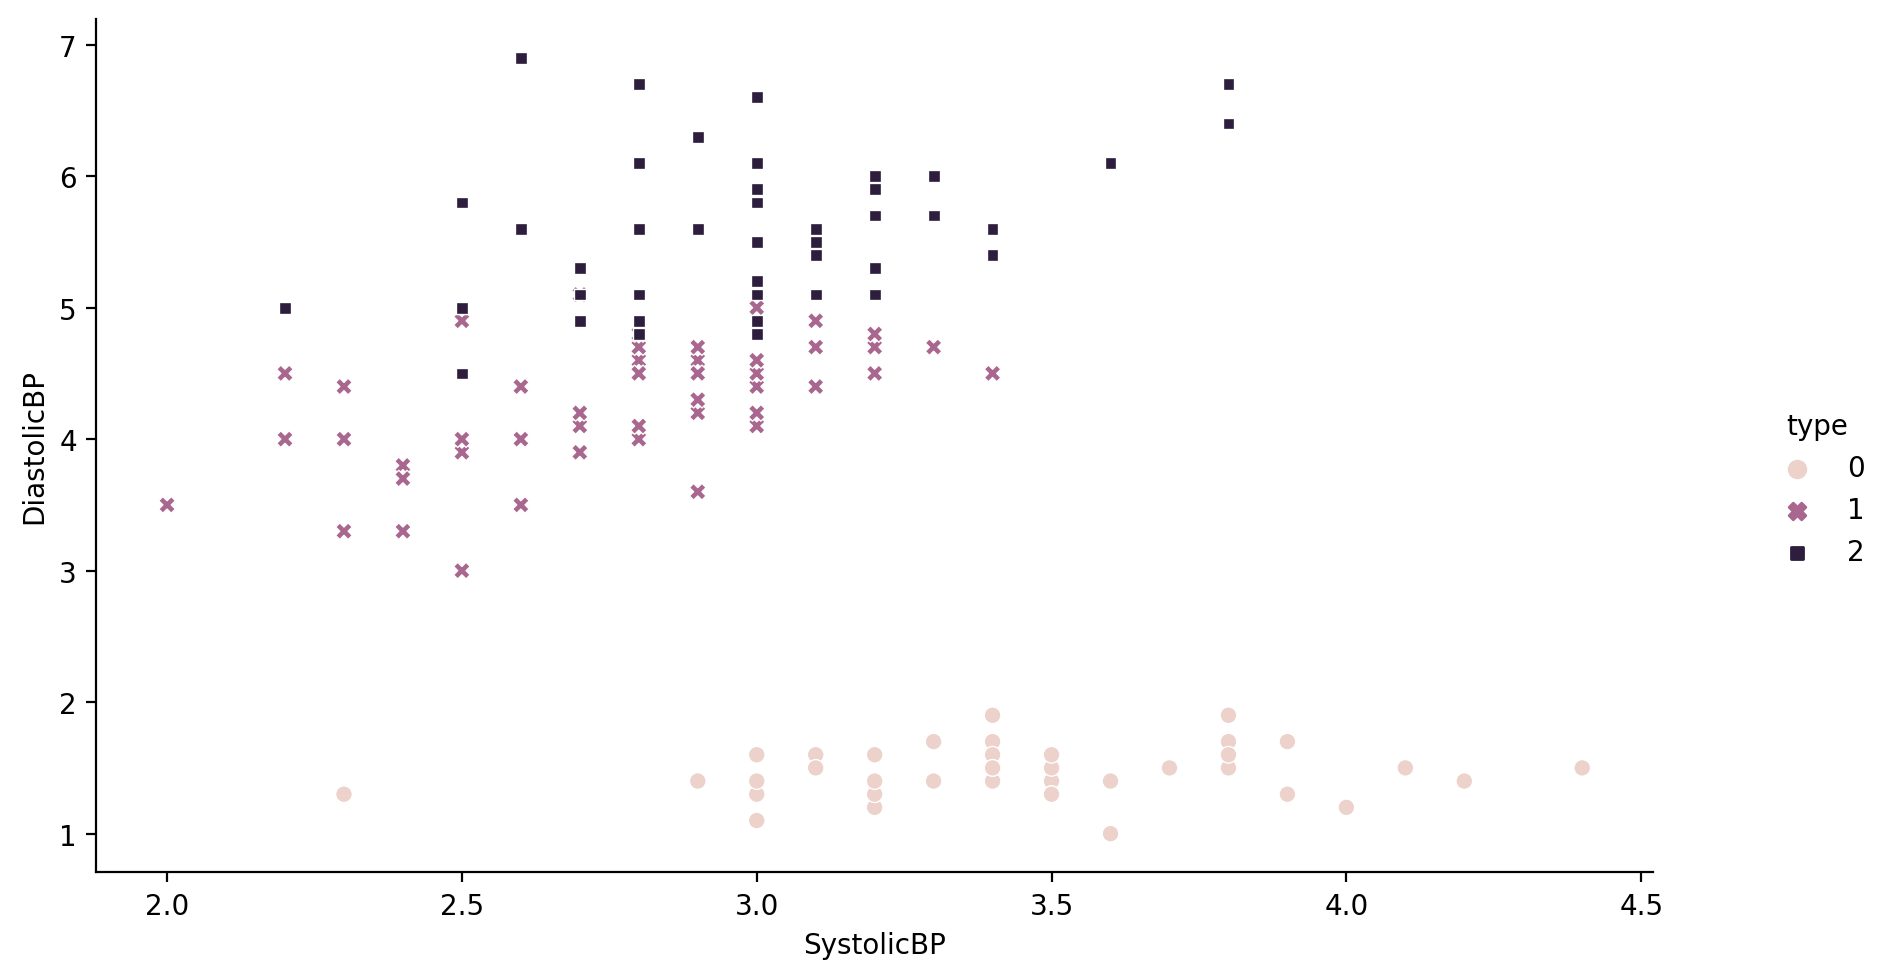

In [18]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris = load_iris()
X = iris['data']
y = iris['target']

SystolicBP = X[:,1]
DiastolicBP = X[:,2]

dc_cancer_de_mama = {
        'SystolicBP': SystolicBP,
        'DiastolicBP' : DiastolicBP,      
        'type' : y
        }

df_cancer_de_mama = pd.DataFrame.from_dict(dc_cancer_de_mama,orient='columns')
print(df_cancer_de_mama)

grafico=sns.relplot(x='SystolicBP',y='DiastolicBP',data=df_cancer_de_mama,hue='type',style='type')
grafico.fig.set_size_inches(10,5)
plt.show()